# SUPERVISED LEARNING - BUILDING YOUR FIRST CLASSIFICATION AND REGRESSION MODELS


### Types of Supervised Machine Learning Problems
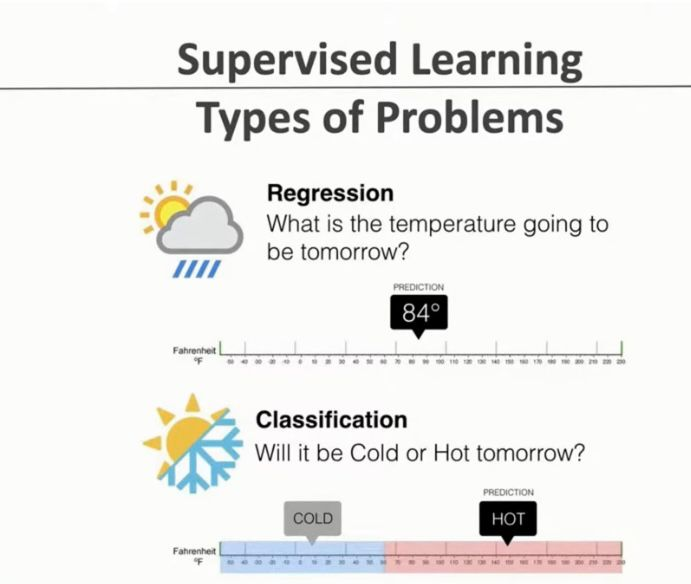


**Classification**
A classification model predicts discrete values. For example, classification models make predictions that answer questions like the following:

- Is a given email message spam or not spam?

- Is this an image of a dog, a cat, or a hamster?


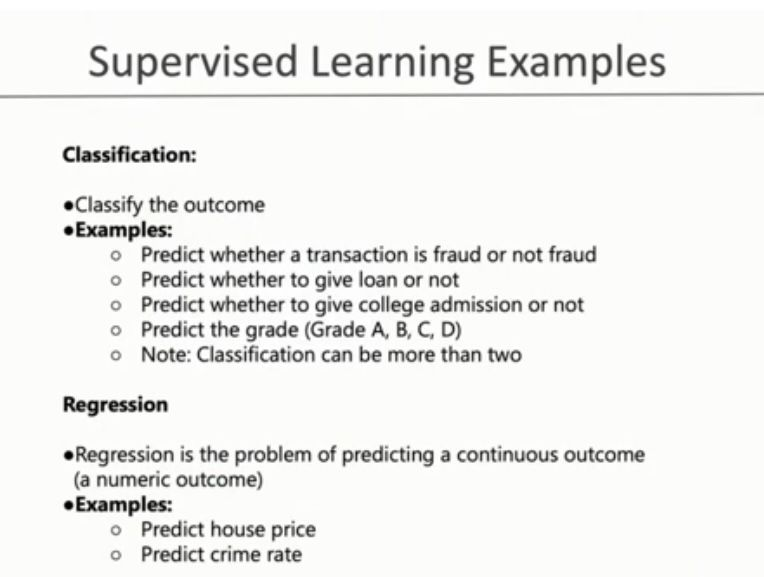

  
**Regression**
A regression model predicts continuous values. For example, regression models make predictions that answer questions like the following:

- What is the value of a house in Nigeria?

- What is the probability that a user will click on this ad?

### Supervised Machine Learning Workflow

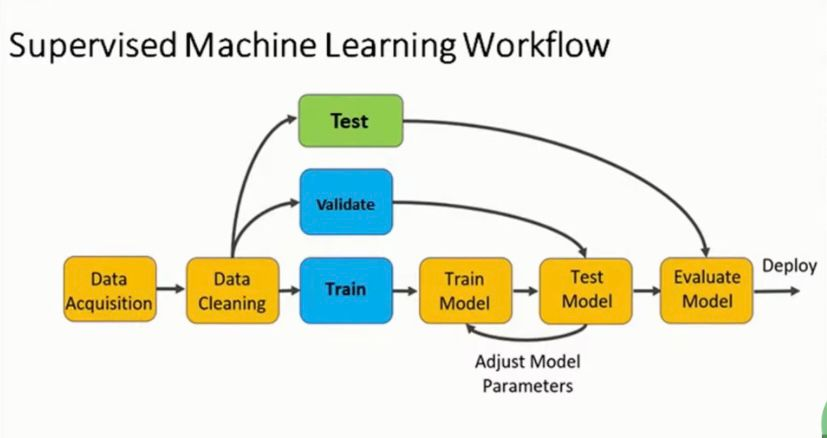


### Some Keywords in Supervised ML

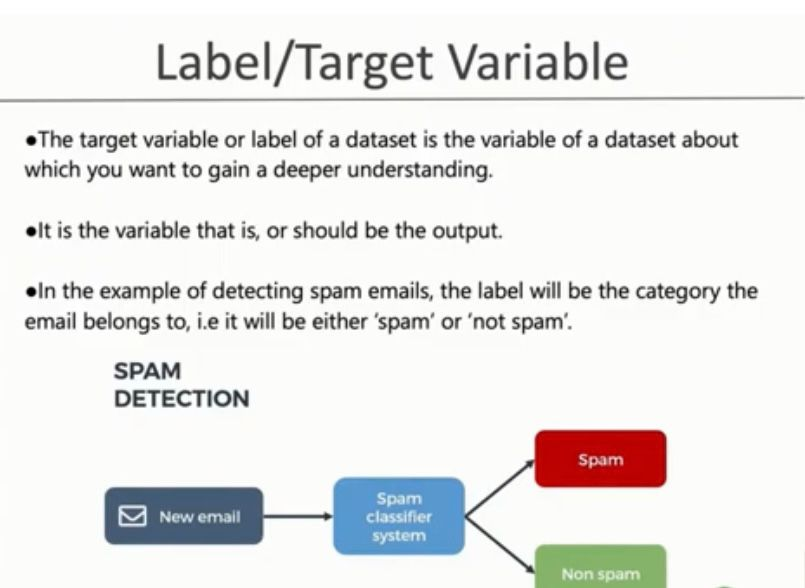
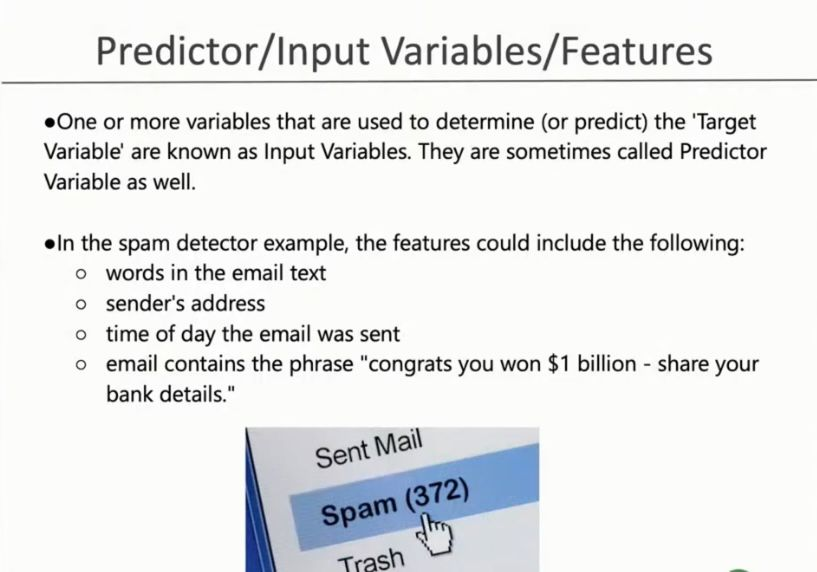

### Train-Test-Split
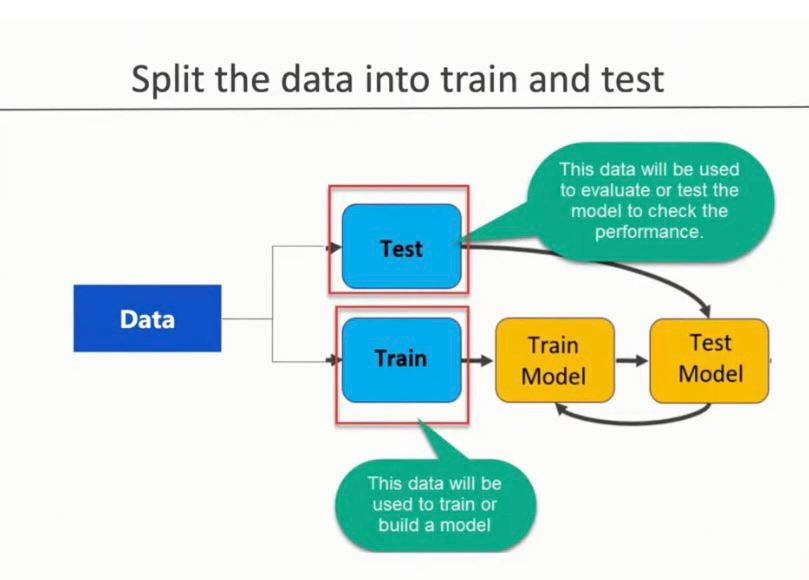
    
  

  


### Classification Model walkthrough

**Load datasets into pandas dataframe**

In [1]:
import pandas as pd
import numpy as np

# import iris data using pandas
iris = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

In [2]:
print(iris.shape)
iris.head(5)

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Data Types and Missing Values**

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check null value counts in iris data
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

There are no null values in the iris dataset

**Descriptive Statistics**

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [7]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


### Split data into train and test

In Machine Learning problems, we always need to split the dataset into train and test sets in order to estimate the performance of the machine learning algorithm.  


1. Train set — a subset to train a model (80%)
2. Test set— a subset to test the trained model (20%)

Your model is trained on 80% of the data and this model is experimented with the 20% data to generate metrics on the model performance.

Let us split our datasets into train and test accordingly

In [8]:
from sklearn import model_selection

# Split data into train and test
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("Shape of the original iris data: ", iris.shape)
print("Shape of the iris train data = ", iris_train.shape)
print("Shape of the iris test data = ", iris_test.shape)

#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

Shape of the original iris data:  (150, 5)
Shape of the iris train data =  (120, 5)
Shape of the iris test data =  (30, 5)


### Feature Selection

In real life data science problems, often the data consist of a large number of attributes or features. This means selecting the most relevant features as the input to machine learning model is absolutely vital. 
Our mode;l depends on the quality of data we work on. 

**Curse of Dimensionality**


The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. 


Therefore it is essential to quality control the data that is being fed to the model. Use features that are statistically important.



**Feature Selection Methods:**
1. Correlation coefficient
2. Variance threshold
3. Recursive Feature Elimination
4. LASSO regularization
4. Random Forest Importance



#### Variance Threshold - Remove Low Variance Features

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

Variance Threshold Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [9]:
# Variance Threshold is only applied to input features, hence the output will be dropped
iris_features = iris.drop('variety', axis=1)

In [10]:
iris_features.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_features.shape

(150, 4)

In [16]:
from sklearn.feature_selection import VarianceThreshold

iris_var = VarianceThreshold()

# Perform variance thresholding
iris_var.fit_transform(iris_features)

# Print the name and variance of each feature
for feature in zip(iris_features.columns, iris_var.variances_):
    print(feature)

('sepal.length', 0.6811222222222223)
('sepal.width', 0.1887128888888889)
('petal.length', 3.0955026666666665)
('petal.width', 0.5771328888888888)


Let's visualize the results by creating a bar chart:

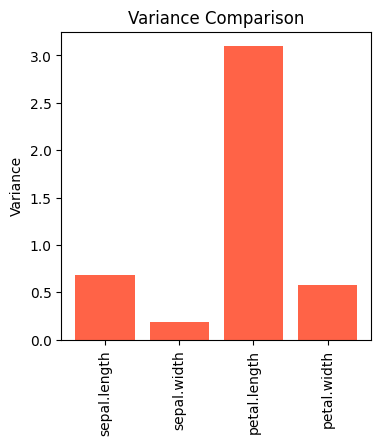

In [13]:
# Create a bar chart for visualizing the variances
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

By default, VarianceThreshold removes only zero-variance features. Zero-variance feature means that the feature has the same value in all instances. Suppose we want to eliminate features that have variance score below 0.2, we can specify threshold parameter.

In [14]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
iris_features_new = selector.fit_transform(iris_features)

# Print the results
print('Number of features before variance thresholding: {}'.format(iris_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(iris_features_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


As we can see, VarianceThreshold automatically eliminate features that have variance below 0.2. In this case, it removes sepal width, which has 0.188 variance.

#### Split data into features and label

For machine learning problems, you need to split your data into features and labels.


1.   Features - Input X to the model
2.   Label - Expected output Y

Therefore, we will further split these train and test datasets by columns, so that for every dataset we have **features** and **labels** to denote if they are the input columns or the predict to columns



In [17]:
#define input and predict to columns
iris_features = ['sepal.length', 'petal.length', 'petal.width']
iris_labels = ['variety']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_label = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_label = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal.length', 'petal.length', 'petal.width']
Labels - ['variety']
✔ Train data split into features and labels
✔ Test data split into features and labels


### Decision Trees
Decision Trees is used for solving supervised learning problems for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.

**Terminology**

Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.
Leaf/Terminal Node: Nodes do not split is called Leaf or Terminal node.

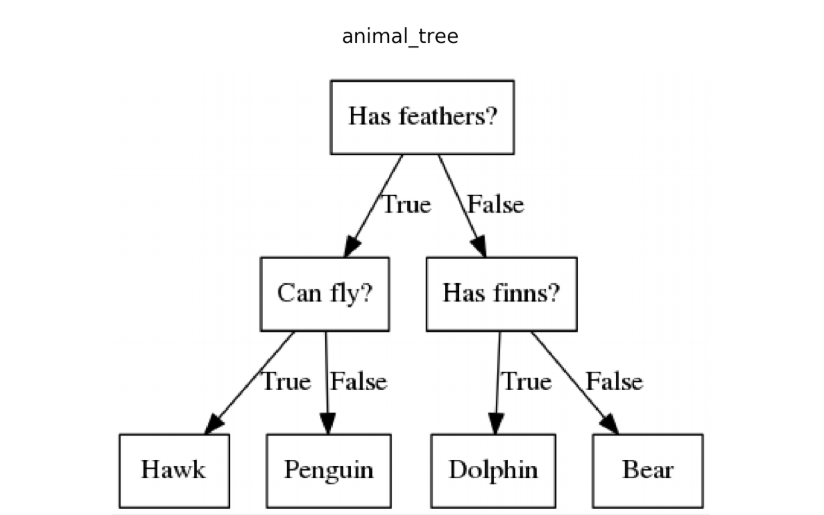


Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [18]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(max_depth=3) # max-depth controls the maximum depth of the tree

# fit the model on train data
dt.fit(iris_train_features, iris_train_label)

DecisionTreeClassifier(max_depth=3)

In [19]:
#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Putting the above predictions and probabilities together to create a readable df
iris_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head(5)

,dt_prediction
0,Virginica
1,Setosa
2,Versicolor
3,Versicolor
4,Virginica


In [20]:
#Concat the predictions of linear regression to the test dataset
iris_test_pred = pd.concat([iris_test_label, iris_pred_label], axis=1)
iris_test_pred.head()

,variety,dt_prediction
0,Virginica,Virginica
1,Setosa,Setosa
2,Versicolor,Versicolor
3,Versicolor,Versicolor
4,Virginica,Virginica


#### Model Evaluation

In [21]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(iris_test_label, iris_pred_label)*100.0, "%")

accuracy is 86.66666666666667 %


### Regression Model Walkthrough

Data: The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

**Getting the Data**

In [ ]:
#BOSTON DATASET
import pandas as pd
from sklearn import datasets

# importing some libraries
import pandas as pd 
from sklearn.model_selection import train_test_split

boston = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv" )


**Data Types and Missing Values**

In [ ]:
# check data summary
boston.info()

In [ ]:
# check null value counts
boston.isnull().sum()

There are no null values in the Boston housing dataset

**Descriptive Statistics**

In [ ]:
boston.describe()

In [ ]:
boston.groupby('MEDV').size()

### Split Data into Training and Testing sets

In [ ]:
from sklearn import model_selection

#create train and test split
boston_train, boston_test = model_selection.train_test_split(boston,test_size=0.2,random_state=1)
print("Shape of the original boston data: ", boston.shape)
print("Shape of the boston train data = ", boston_train.shape)
print("Shape of the boston test data = ", boston_test.shape)

#Resetting index for prediction time
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

### Feature Selection


In the boston dataset, are there any columns that are not useful or have very low correlation?

- A correlation value can range between -1 to 1. 
- Value closer to -1 means high negative correlation between two variables
- Value closer to +1 means high positive correlation between two variables
- Value closer to 0 means no or very low correlation between two variables

In [ ]:
import seaborn as sns

boston_corr_matrix = boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

Since MEDV is our predict column, we want to pick features which have a positive and negative correlation with MEDV. Adding in columns which have a low or non-existent correlation would add to our 'Curse of Dimensionality' issue.

For this, let us pick only the top 4 most correlated features to MEDV for training our model.

In [ ]:
#printing all the correlations to MEDV in descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

For this, let us pick 2 variables with high positive correlation (RM,ZN) and 2 with high negative correlation (PTRATIO, LSSTAT).

We will do this in the data pipeline section to ensure the same processes are done over the train and test datasets.

## Split Data into Features and Labels

For the Boston dataset, we are going to use only input columns we selected from the Feature Selection process (RM, ZN, PTRATIO, INDUS) and the output column would be 'MEDV'

In [ ]:
#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'LSTAT']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

## Model Creation

#### Linear Regression Intuition
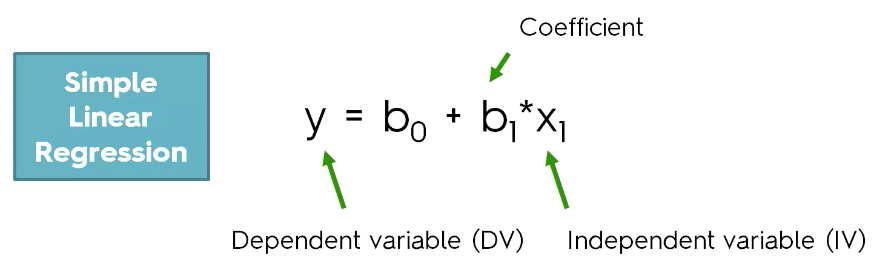

**Scenario: Simple Linear Regression**

Suppose we have a dataset which contains information about relationship between 'Years of experience' and 'Salary' in a particular work field.

The dependent variable could represent salary. You could assume that level of experience will impact salary. So, you would label the independent variable as experience.

Representing the experience with variable x and salary with y, we can say that y ∝ x. ( y is proportional to x).

However, a change in x does not usually mean an equal change in y.

The coefficient can be thought of as a multiplier that connects the independent and dependent variables. It translates how much y will be affected by a unit change in x.

Let's add a coefficient b1 to our example.

We thus get $y = b_1*x$

Now the salaries in a particular job always start with the base amount or the lowest possible salary. We thus need to take that constant in consideration.

The constant b0 would be the starting salary for someone with a zero level of experience. Assuming every fresher in the company gets 30K as starting salary we can set it as the base price.

Finally, we have:

$Salary = b_0 + b_1* Experience$

or

$y = b_0 + b_1*x$

This is similar to the equation of a straight line $y= m*x +c$

**Our objective is to find the values of $b_0$ and $b_1$ that will best fit this data.**

These 2 variables/coefficients are actually called hyperparameters. In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. And we must always try to find some optimal parameters while building a machine learning model.

This line is your regression model.

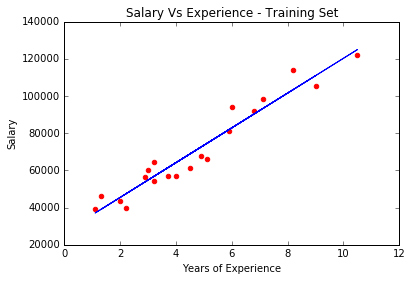

Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

# create the model object
lr = LinearRegression()

# fit the model on train data
lr.fit(boston_train_features, boston_train_labels)

### Predicting the Test set Results

In [ ]:
#Predictions on the Test data
predictions_lr = lr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

In [ ]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

In [ ]:
# interpreting coefficients
# prints y-intercept
print(lr.intercept_)

# prints the coefficient
print(lr.coef_)

The intercept will be your $b_0$ value; and coefficient will be $b_1$.

### Model Evaluation

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

Mean Squared Error: It is simply the average of the squared difference between the target value and the value predicted by the regression model.

Root Mean Squared Error: It is the square root of the averaged squared difference between the target value and the value predicted by the model.

Mean Absolute Error: It is the absolute difference between the target value and the value predicted by the model. 

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction']))

#print result of MSE
print(metrics.mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction']))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction'])))